# Project Part 3: Feature Exploration and Visualization

* Student name: Daniel Büttner

## Further Feature Exploration corresponding to House Prices, and Visualization

- 1) Loading relevant modules and cleaned data set from file, adding columns
- 2) Exploration and Visualization of Sales Prices, and most relevant features from Regression Analysis: Sqft Living, Grade, Zipcode

## 1) Loading relevant modules and cleaned data set from file, adding columns:

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium as fol
import statsmodels.api as sms
import statsmodels.formula.api as smf

file1 = '/Users/dbuettner/nf-ds/Project_Data_Analysis/House_Prices_Project/king_county_house_prices_dataset_cleaned.csv'
h_p = pd.read_csv(file1, skipinitialspace=True, parse_dates=['date'], index_col='date')

In [10]:
# Add separate columns for year, month and day information

date_year = h_p.date.apply(lambda d: d.year)
date_year.name = 'date_year'
date_month = h_p.date.apply(lambda d: d.month)
date_month.name = 'date_month'
date_day = h_p.date.apply(lambda d: d.day)
date_day.name = 'date_day'
#h_p.date[:10].month
date_month.max()

h_p = pd.concat([h_p, date_year, date_month, date_day], axis=1)
#h_p.info()

In [11]:
print('Start of the data set    : ' , h_p.date.sort_values().iloc[0])
print('End of the data set      : ' , h_p.date.sort_values().iloc[-1])

Start of the data set    :  2014-05-02 00:00:00
End of the data set      :  2015-05-27 00:00:00


In [208]:
# Add columns for average price per sqft (living, above, basement) and average sqft (living, above) per price (100000$):

h_p['p_p_sqft1'] = h_p.price / h_p.sqft_living                   # price per square feat (living)
h_p['p_p_sqft2'] = h_p.price / h_p.sqft_above                    # price per square feat (above)
h_p['sqft_p_p1'] = (h_p.sqft_living / h_p.price) * 100000.       # square feat (living) per 100000$
h_p['sqft_p_p2'] = (h_p.sqft_above / h_p.price) * 100000.        # square feat (above) per 100000$

## 2) Exploration and Visualization of Sales Prices, and most relevant features from Regression Analysis: Sqft Living, Grade, Zipcode

In [181]:
# 2-Dimensional Histogram of House Price and Living Area:

#plt.subplots(figsize=(15,10))
#plt.hist2d(h_p['sqft_living'], h_p['price'], bins=300, cmap=plt.cm.jet)
#plt.xlim(0, 4000)
#plt.ylim(0, 1000000)
#plt.xlabel('sqft_living')
#plt.ylabel('price')
#plt.show()

#  not working here?????!!!!!! copy from Part_2

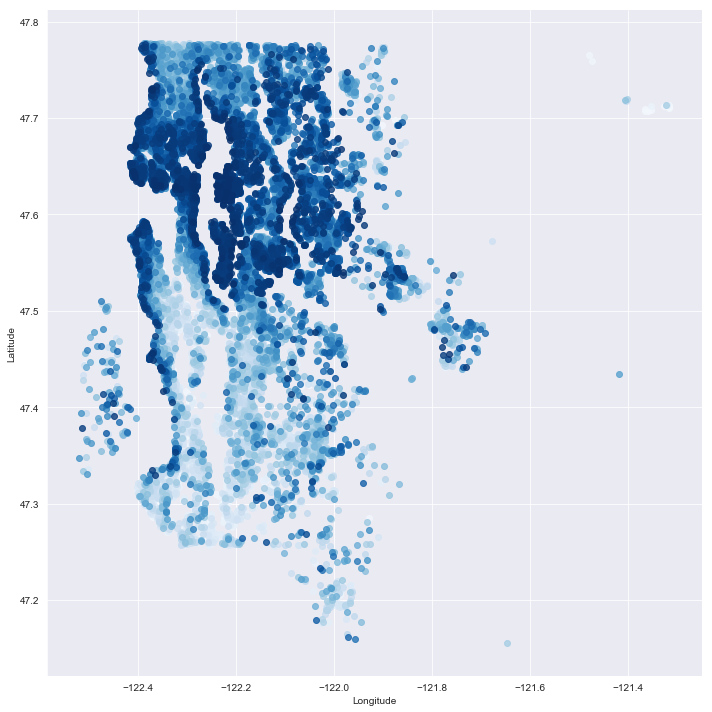

In [210]:
# Plot scatter plot of Longitude and Latitude, were darker colors show higher House Prices:

sns.set_style("darkgrid")
sns.lmplot(data=h_p, y="lat", x="long", hue="price", fit_reg=False, height = 10, legend = False, palette = "Blues")

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

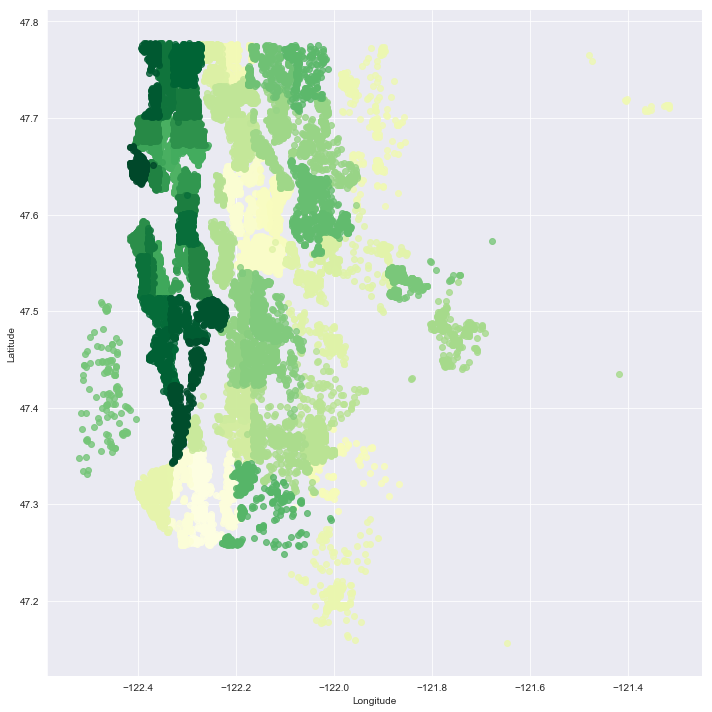

In [183]:
# Plot scatter plot of Longitude and Latitude, where different colors represent different Zipcode Areas:

sns.set_style("darkgrid")
sns.lmplot(data=h_p, y="lat", x="long", hue="zipcode", fit_reg=False, height = 10, legend = False, palette = "YlGn")

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [200]:
# Plotting mean House Prices per Zipcode Areas using Folium and a Json File:

#h_p_map = h_p.copy()   # groupby has to be applied as otherwise other (maximum?!) values are taken
h_p_map = h_p.groupby('zipcode').mean()
h_p_map['zipcode'] = h_p_map.index.values
h_p_map.zipcode = h_p_map.zipcode.astype('str')


# Import libraries
#import pandas as pd
#import folium
 
# Load the shape of the zone (US states)
# Find the original file here: https://github.com/python-visualization/folium/tree/master/examples/data
# You have to download this file and set the directory where you saved it
#state_geo = os.path.join('/Users/dbuettner/nf-ds/Project_Data_Analysis/SeattleMSA2/', 'SeattleMSA2.geojson')
state_geo = '/Users/dbuettner/nf-ds/Project_Data_Analysis/SeattleMSA2/SeattleMSA2.json'
#/Users/dbuettner/nf-ds/Project_Data_Analysis/SeattleMSA2/SeattleMSA2 Kopie.json

# Load the unemployment value of each state
# Find the original file here: https://github.com/python-visualization/folium/tree/master/examples/data
#state_unemployment = os.path.join('/Users/y.holtz/Desktop/', 'US_Unemployment_Oct2012.csv')
#state_data = pd.read_csv(state_unemployment)
 
# Initialize the map:
map1 = fol.Map(location=[h_p.lat.mean(), h_p.long.mean()], zoom_start=11)
 
# Add the color for the chloropleth:
map1.choropleth(
 geo_data  = state_geo,
 name = 'choropleth',
 data = h_p_map,
 columns = ['zipcode', 'price'],
 #key_on='feature.id',
 key_on = 'feature.properties.ZIP',
 fill_color = 'YlGn',
 fill_opacity = 0.7,
 line_opacity = 0.2,
 legend_name = 'Average House Price in USD'
)
fol.LayerControl().add_to(map1)
 
# Save to html
map1
#map1.save('folium_choropleth_house_price.html')



//anaconda3/envs/nf/lib/python3.6/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [201]:
# Plotting average Living Area per Zipcode Areas using Folium and a Json File:

#h_p_map = h_p.copy()
h_p_map = h_p.groupby('zipcode').mean()
h_p_map['zipcode'] = h_p_map.index.values
h_p_map.zipcode = h_p_map.zipcode.astype('str')


# Import libraries
#import pandas as pd
#import folium
 
# Load the shape of the zone (US states)
# Find the original file here: https://github.com/python-visualization/folium/tree/master/examples/data
# You have to download this file and set the directory where you saved it
#state_geo = os.path.join('/Users/dbuettner/nf-ds/Project_Data_Analysis/SeattleMSA2/', 'SeattleMSA2.geojson')
state_geo = '/Users/dbuettner/nf-ds/Project_Data_Analysis/SeattleMSA2/SeattleMSA2.json'
#/Users/dbuettner/nf-ds/Project_Data_Analysis/SeattleMSA2/SeattleMSA2 Kopie.json

# Load the unemployment value of each state
# Find the original file here: https://github.com/python-visualization/folium/tree/master/examples/data
#state_unemployment = os.path.join('/Users/y.holtz/Desktop/', 'US_Unemployment_Oct2012.csv')
#state_data = pd.read_csv(state_unemployment)
 
# Initialize the map:
map1 = fol.Map(location=[h_p.lat.mean(), h_p.long.mean()], zoom_start=11)
 
# Add the color for the chloropleth:
map1.choropleth(
 geo_data  = state_geo,
 name = 'choropleth',
 data = h_p_map,
 columns = ['zipcode', 'sqft_living'],
 #key_on='feature.id',
 key_on = 'feature.properties.ZIP',
 fill_color = 'YlGn',
 fill_opacity = 0.7,
 line_opacity = 0.2,
 legend_name = 'Average Living Area in sqft'
)
fol.LayerControl().add_to(map1)
 
# Save to html
map1
#map1.save('folium_choropleth_house_price.html')



//anaconda3/envs/nf/lib/python3.6/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [204]:
# Plotting the mean of different variables per Zipcode Areas using Folium and a Json File:

#h_p_map = h_p.copy()
h_p_map = h_p.groupby('zipcode').mean()
h_p_map['zipcode'] = h_p_map.index.values
h_p_map.zipcode = h_p_map.zipcode.astype('str')


# Import libraries
#import pandas as pd
#import folium
 
# Load the shape of the zone (US states)
# Find the original file here: https://github.com/python-visualization/folium/tree/master/examples/data
# You have to download this file and set the directory where you saved it
#state_geo = os.path.join('/Users/dbuettner/nf-ds/Project_Data_Analysis/SeattleMSA2/', 'SeattleMSA2.geojson')
state_geo = '/Users/dbuettner/nf-ds/Project_Data_Analysis/SeattleMSA2/SeattleMSA2.json'
#/Users/dbuettner/nf-ds/Project_Data_Analysis/SeattleMSA2/SeattleMSA2 Kopie.json

# Load the unemployment value of each state
# Find the original file here: https://github.com/python-visualization/folium/tree/master/examples/data
#state_unemployment = os.path.join('/Users/y.holtz/Desktop/', 'US_Unemployment_Oct2012.csv')
#state_data = pd.read_csv(state_unemployment)
 
# Initialize the map:
map1 = fol.Map(location=[h_p.lat.mean(), h_p.long.mean()], zoom_start=11)
 
# Add the color for the chloropleth:
map1.choropleth(
 geo_data  = state_geo,
 name = 'choropleth',
 data = h_p_map,
 columns = ['zipcode', 'grade'],
 #key_on='feature.id',
 key_on = 'feature.properties.ZIP',
 fill_color = 'YlGn',
 fill_opacity = 0.7,
 line_opacity = 0.2,
 legend_name = 'Average Grade'
)
fol.LayerControl().add_to(map1)
 
# Save to html
map1
#map1.save('folium_choropleth_house_price.html')



//anaconda3/envs/nf/lib/python3.6/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [203]:
#h_p_map = h_p.groupby('zipcode').mean()
#h_p_map['zipcode'] = h_p_map.index.values
#h_p_map.zipcode.iloc[:10]
#h_p_map.info()

In [206]:
# Plotting mean House Prices per Zipcode Areas using Folium and a Json File:

#h_p_map = h_p.copy()
h_p_map = h_p.groupby('zipcode').mean()
h_p_map['zipcode'] = h_p_map.index.values
h_p_map.zipcode = h_p_map.zipcode.astype('str')


# Import libraries
#import pandas as pd
#import folium
 
# Load the shape of the zone (US states)
# Find the original file here: https://github.com/python-visualization/folium/tree/master/examples/data
# You have to download this file and set the directory where you saved it
#state_geo = os.path.join('/Users/dbuettner/nf-ds/Project_Data_Analysis/SeattleMSA2/', 'SeattleMSA2.geojson')
state_geo = '/Users/dbuettner/nf-ds/Project_Data_Analysis/SeattleMSA2/SeattleMSA2.json'
#/Users/dbuettner/nf-ds/Project_Data_Analysis/SeattleMSA2/SeattleMSA2 Kopie.json

# Load the unemployment value of each state
# Find the original file here: https://github.com/python-visualization/folium/tree/master/examples/data
#state_unemployment = os.path.join('/Users/y.holtz/Desktop/', 'US_Unemployment_Oct2012.csv')
#state_data = pd.read_csv(state_unemployment)
 
# Initialize the map:
map1 = fol.Map(location=[h_p.lat.mean(), h_p.long.mean()], zoom_start=11)
 
# Add the color for the chloropleth:
map1.choropleth(
 geo_data  = state_geo,
 name = 'choropleth',
 data = h_p_map,
 columns = ['zipcode', 'yr_built'],
 #key_on='feature.id',
 key_on = 'feature.properties.ZIP',
 fill_color = 'YlGn',
 fill_opacity = 0.7,
 line_opacity = 0.2,
 legend_name = 'Average Year Built'
)
fol.LayerControl().add_to(map1)
 
# Save to html
map1
#map1.save('folium_choropleth_house_price.html')



//anaconda3/envs/nf/lib/python3.6/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [209]:
# Plotting mean House Prices per Zipcode Areas using Folium and a Json File:

#h_p_map = h_p.copy()
h_p_map = h_p.groupby('zipcode').mean()
h_p_map['zipcode'] = h_p_map.index.values
h_p_map.zipcode = h_p_map.zipcode.astype('str')


# Import libraries
#import pandas as pd
#import folium
 
# Load the shape of the zone (US states)
# Find the original file here: https://github.com/python-visualization/folium/tree/master/examples/data
# You have to download this file and set the directory where you saved it
#state_geo = os.path.join('/Users/dbuettner/nf-ds/Project_Data_Analysis/SeattleMSA2/', 'SeattleMSA2.geojson')
state_geo = '/Users/dbuettner/nf-ds/Project_Data_Analysis/SeattleMSA2/SeattleMSA2.json'
#/Users/dbuettner/nf-ds/Project_Data_Analysis/SeattleMSA2/SeattleMSA2 Kopie.json

# Load the unemployment value of each state
# Find the original file here: https://github.com/python-visualization/folium/tree/master/examples/data
#state_unemployment = os.path.join('/Users/y.holtz/Desktop/', 'US_Unemployment_Oct2012.csv')
#state_data = pd.read_csv(state_unemployment)
 
# Initialize the map:
map1 = fol.Map(location=[h_p.lat.mean(), h_p.long.mean()], zoom_start=11)
 
# Add the color for the chloropleth:
map1.choropleth(
 geo_data  = state_geo,
 name = 'choropleth',
 data = h_p_map,
 columns = ['zipcode', 'p_p_sqft1'],
 #key_on='feature.id',
 key_on = 'feature.properties.ZIP',
 fill_color = 'YlGn',
 fill_opacity = 0.7,
 line_opacity = 0.2,
 legend_name = 'Average Price per Square Feet of Living Area'
)
fol.LayerControl().add_to(map1)
 
# Save to html
map1
#map1.save('folium_choropleth_house_price.html')

//anaconda3/envs/nf/lib/python3.6/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [47]:
#h_p.price.resample('M').mean().index

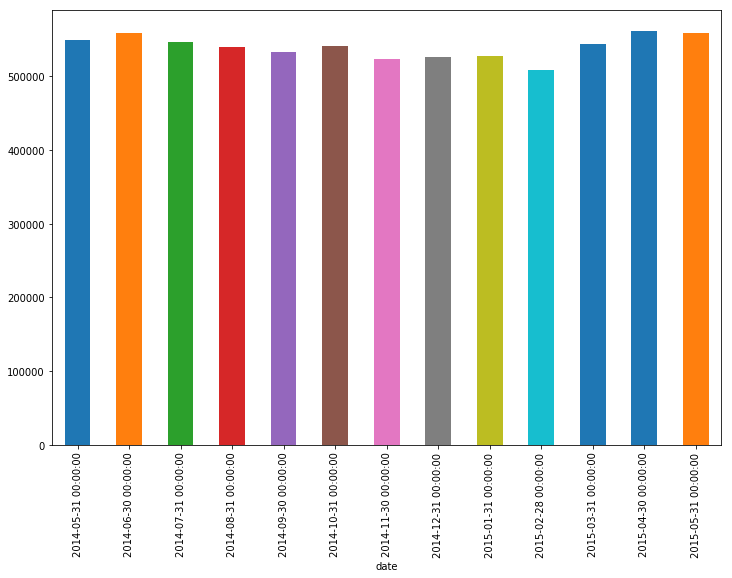

In [73]:
# Monthly mean house price for the data set:

plt.figure(figsize=(12,8))
h_p.price.resample('M').mean().plot(kind='bar')
#plt.xticks(h_p.price.resample('M').mean(), h_p.price.resample('M').mean().index, rotation=0)
plt.show()

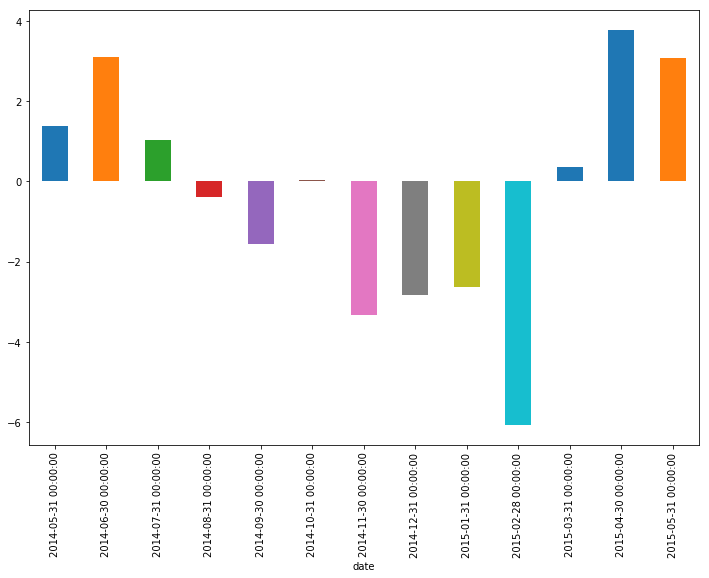

In [48]:
# Monthly mean house price for the data set, difference to the mean overall house price in percent:

plt.figure(figsize=(12,8))
h_p.price.resample('M').mean().div(h_p.price.mean()).mul(100).sub(100).plot(kind='bar')
#plt.xticks(h_p.price.resample('M').mean(), h_p.price.resample('M').mean().index, rotation=0)
plt.show()

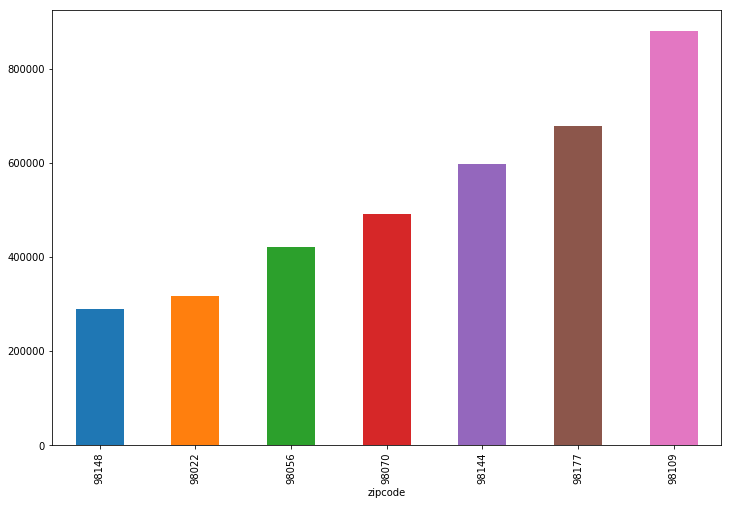

In [99]:
# Mean house prices per zipcode groups, bar chart for 7 examplary zipcodes

h_p_zipcode_groups = h_p.groupby('zipcode').mean().price
#print(h_p_zipcode_groups.sort_values().index)
#h_p_zipcode_groups.sort_values().index[4::10]
plt.figure(figsize=(12,8))
h_p_zipcode_groups.sort_values()[4::10].plot(kind='bar')
plt.show()

In [98]:
# zipcode group averages, future work
#j = 0
#k = 10
#h_p_zipcode_groups2 = []

#for i in range(7):
    
#    mean_hp = h_p_zipcode_groups.sort_values()[j:k].mean()
#    h_p_zipcode_groups2.append(mean_hp)
#    j = j + 10
#    k = k + 10

#plt.bar(x=[1,2,3,4,5,6,7], height=h_p_zipcode_groups2)
#plt.show()

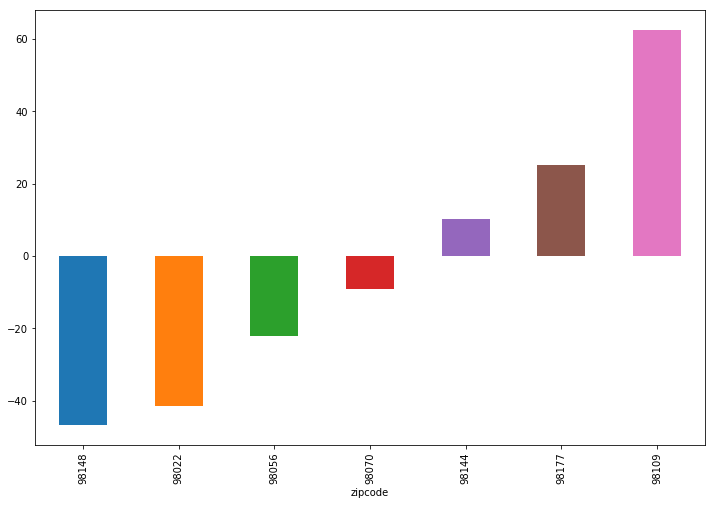

In [101]:
# Mean house prices per zipcode groups, bar chart for 7 examplary zipcodes, price difference to overall mean in %:

#h_p_zipcode_groups = h_p.groupby('zipcode').mean().price
#print(h_p_zipcode_groups.sort_values().index)
#h_p_zipcode_groups.sort_values().index[4::10]
plt.figure(figsize=(12,8))
h_p_zipcode_groups.sort_values()[4::10].div(h_p.price.mean()).mul(100).sub(100).plot(kind='bar')
plt.show()

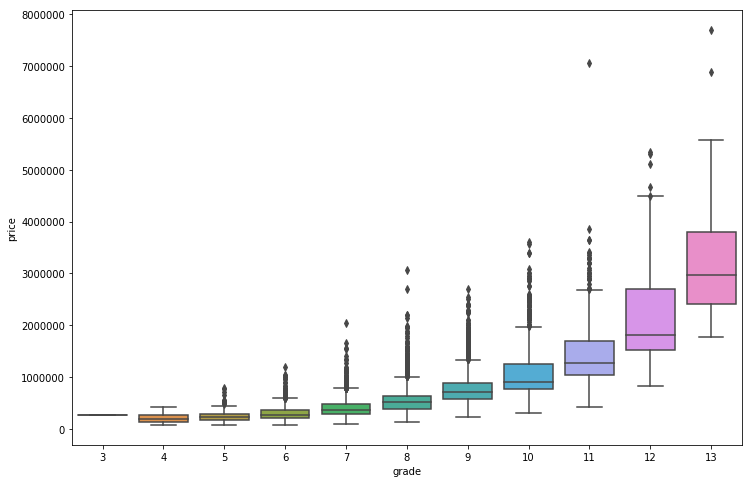

In [103]:
# Boxplots for House Prices in each Grade Category:

plt.figure(figsize=(12,8))
sns.boxplot(data=h_p, x='grade', y='price')
plt.show()

In [ ]:
#h_p.yr_built.values[:10]

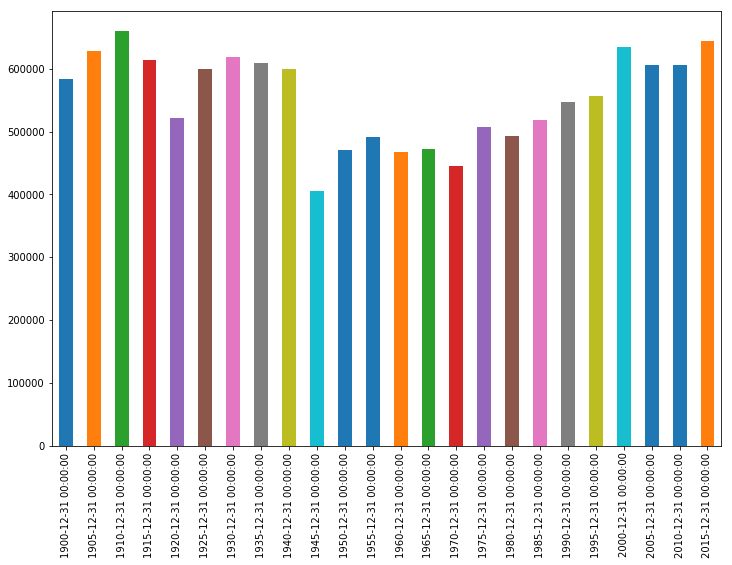

In [177]:
# Take yr_built column as index, then show 5 year mean House Prices:

h_p2 = h_p.copy()
h_p2.yr_built.values
#h_p2['yr_built'] = pd.to_datetime(h_p2['yr_built'].values)
#h_p2.yr_built.sort_values
#h_p2.sort_index(inplace=True)


h_p2.set_index(h_p2.yr_built.values, inplace=True)
h_p2.sort_index(inplace=True)
h_p2.index = pd.to_datetime(h_p2.index, format='%Y')  # converting int64 index to datetime not working, always 1970-01-01 ...
h_p2.index

#h_p2.info()

plt.figure(figsize=(12,8))
h_p2.price.resample('5Y').mean().plot(kind='bar')
plt.show()



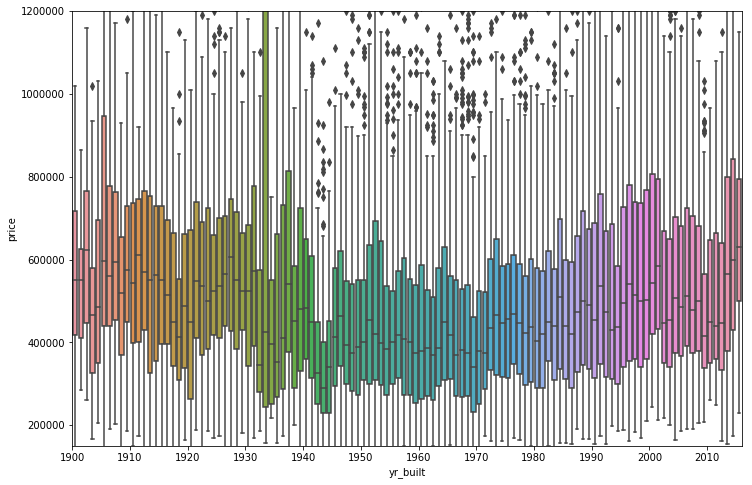

In [176]:
# Boxplots for House Prices and Years the Houses were built in:

plt.figure(figsize=(12,8))
ax = sns.boxplot(data=h_p, x='yr_built', y='price')
ax.set(ylim=(150000, 1200000))
start, end = ax.get_xlim()
start2 = h_p.yr_built.min()
end2 = h_p.yr_built.max()
ax.xaxis.set_ticks(np.arange(start, end, 10))
#ax.set_xticklabels(ax.get_xticklabels()[::10], rotation=90)
ax.set_xticklabels(np.arange(start2, end2, 10), rotation=0)
plt.show()

In [166]:
#plt.figure(figsize=(12,8))
#ax = sns.boxplot(data=h_p, x='yr_built', y='price')
#ax.set(ylim=(150000, 1200000))
#start, end = ax.get_xlim()
#print(start)
#print(end)
#print(h_p.yr_built.min())
#print(h_p.yr_built.max())
#start2 = h_p.yr_built.min()
#end2 = h_p.yr_built.max()
#ax.xaxis.set_ticks(np.arange(start, end, 10))
#ax.set_xticklabels(ax.get_xticklabels()[::10], rotation=90)
#ax.set_xticklabels(np.arange(start2, end2, 10), rotation=0)
#plt.ylim(0, 150000)
#plt.show()

//anaconda3/envs/nf/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


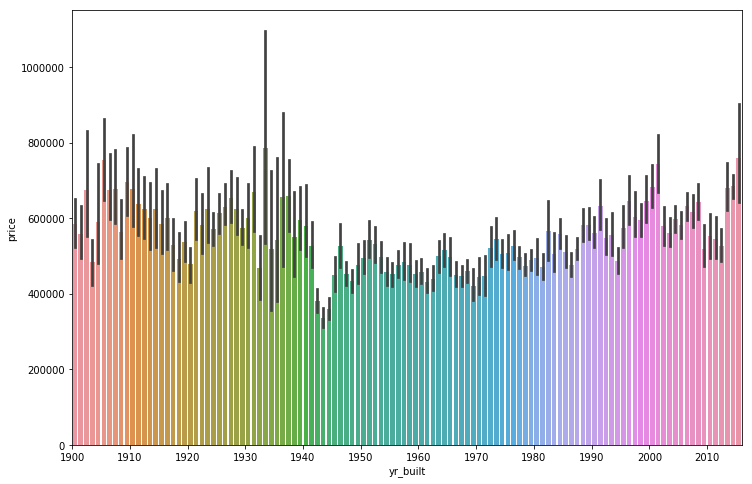

In [173]:
# Barplots for House Prices for every Year the Houses were built in:

plt.figure(figsize=(12,8))
ax = sns.barplot(data=h_p, x='yr_built', y='price')
#ax.set(ylim=(0, 1200000))
start, end = ax.get_xlim()
start2 = h_p.yr_built.min()
end2 = h_p.yr_built.max()
ax.xaxis.set_ticks(np.arange(start, end, 10))
#ax.set_xticklabels(ax.get_xticklabels()[::10], rotation=90)
ax.set_xticklabels(np.arange(start2, end2, 10), rotation=0)
plt.show()

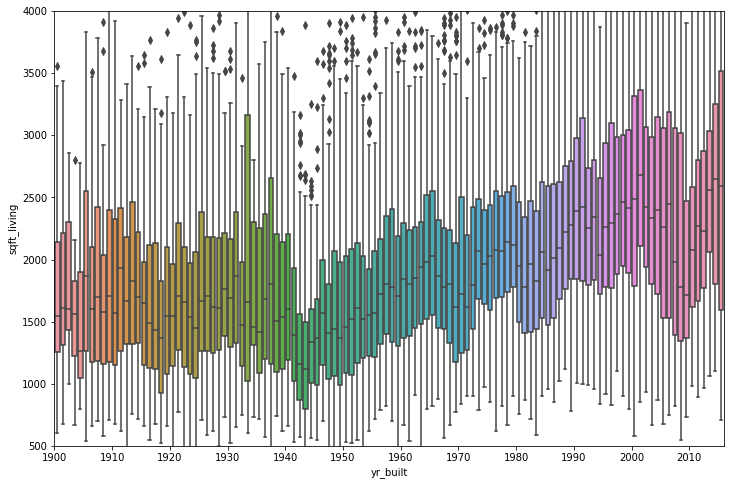

In [171]:
# Boxplots for Living Area in Square Feet and Years the Houses were built in:

plt.figure(figsize=(12,8))
ax = sns.boxplot(data=h_p, x='yr_built', y='sqft_living')
ax.set(ylim=(500, 4000))
start, end = ax.get_xlim()
start2 = h_p.yr_built.min()
end2 = h_p.yr_built.max()
ax.xaxis.set_ticks(np.arange(start, end, 10))
#ax.set_xticklabels(ax.get_xticklabels()[::10], rotation=90)
ax.set_xticklabels(np.arange(start2, end2, 10), rotation=0)
plt.show()

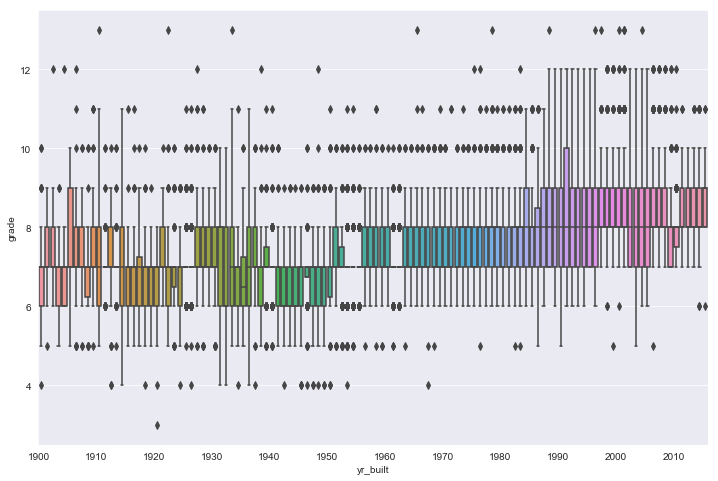

In [211]:
# Boxplots for Grade and Years the Houses were built in:

plt.figure(figsize=(12,8))
ax = sns.boxplot(data=h_p, x='yr_built', y='grade')
#ax.set(ylim=(500, 4000))
start, end = ax.get_xlim()
start2 = h_p.yr_built.min()
end2 = h_p.yr_built.max()
ax.xaxis.set_ticks(np.arange(start, end, 10))
#ax.set_xticklabels(ax.get_xticklabels()[::10], rotation=90)
ax.set_xticklabels(np.arange(start2, end2, 10), rotation=0)
plt.show()